In [1]:
import rasterio as rs
import numpy as np
import seaborn as sns

In [201]:
median_ref = np.median(np.concatenate([
    x2017[np.newaxis],
    x2019[np.newaxis],
    x2022[np.newaxis]
], axis = 0), axis = 0)

mean_ref_static = np.mean(median_ref[gain == 0], axis = 0)
std_ref_static = np.std(median_ref[gain == 0], axis = 0)

In [202]:
import hickle as hkl
f = "2332/957/2332X957Y_composite.hkl"
x2017 = hkl.load(f'../../project-monitoring/tiles/2017/{f}').squeeze()

mean_src = np.mean(x2017, axis = (0, 1))
std_src = np.std(x2017, axis = (0, 1))
std_mult = std_ref_static / std_src
addition = (mean_ref_static - (mean_src * (std_mult)))

x2017 = x2017 * std_mult + addition
#sns.heatmap(x2017[..., 3], vmax = 6000)

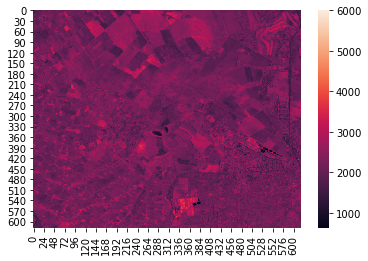

In [203]:
import hickle as hkl
x2019 = hkl.load(f'../../project-monitoring/tiles/2019/{f}').squeeze()

mean_src = np.mean(x2019, axis = (0, 1))
std_src = np.std(x2019, axis = (0, 1))
std_mult = std_ref_static / std_src
addition = (mean_ref_static - (mean_src * (std_mult)))

x2019 = x2019 * std_mult + addition

sns.heatmap(x2019[..., 3], vmax = 6000)

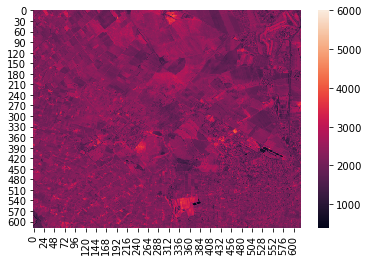

In [204]:
import hickle as hkl
x2022 = hkl.load(f'../../project-monitoring/tiles/2022/{f}').squeeze()

mean_src = np.mean(x2022, axis = (0, 1))
std_src = np.std(x2022, axis = (0, 1))
std_mult = std_ref_static / std_src
addition = (mean_ref_static - (mean_src * (std_mult)))
x2022 = x2022 * std_mult + addition
sns.heatmap(x2022[..., 3], vmax = 6000)

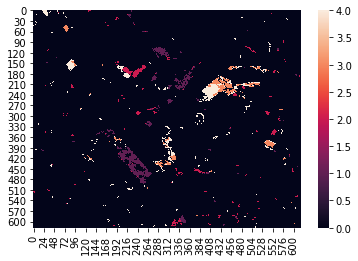

In [205]:
import hickle as hkl
gain = rs.open("2332X957Y_change.tif").read(1)
sns.heatmap(gain)

In [206]:
gainpx2022 = x2022[gain == 0]

In [207]:
gainpx2020 = x2020[gain == 0]
gainpx2021 = x2021[gain == 0]

In [244]:
def cva(X, Y):
    X = np.float32(X[..., :10]) / 10000
    Y = np.float32(Y[..., :10]) / 10000
    diff = np.abs(X - Y)
    diff_s = (diff ** 2).sum(axis=-1)

    return np.sqrt(diff_s)

cva_static = cva(x2019, x2017)

In [245]:
cva_gain = cva(x2022, x2019)

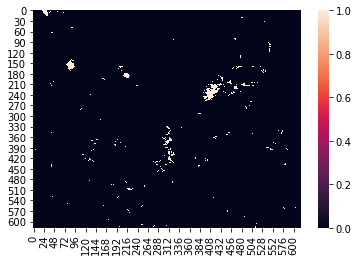

In [246]:
sns.heatmap(((cva_gain * (gain == 4) ) - (cva_static * (gain == 4)))
            > 0)

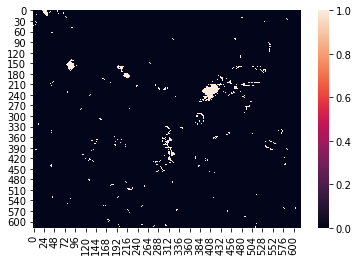

In [237]:
sns.heatmap(gain == 4)